In [243]:
import requests
import json
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

In [79]:
url = 'https://api.upstox.com/v2/historical-candle/NSE_EQ%7CINE848E01016/1minute/2024-07-02/2024-01-01'
headers = {
    'Accept': 'application/json'
}

response = requests.get(url, headers=headers)

# Check the response status
if response.status_code == 200:
    # Do something with the response data (e.g., print it)
    with open('./data.json','w') as file:
        json.dump(response.json(),file)
else:
    # Print an error message if the request was not successful
    print(f"Error: {response.status_code} - {response.text}")

In [82]:
file = open('./data.json')
data = json.load(file)

In [85]:
data['data']['candles'][0][0]

'2024-07-02T15:29:00+05:30'

In [87]:
data2 = pd.read_csv('data/NIFTY 50 - Minute data.csv')

In [127]:
(len(data2)-132)/375

2231.0

In [129]:
len(data2)/375

2231.352

In [130]:
data2[0:375]

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0
...,...,...,...,...,...,...
370,2015-01-09 15:25:00,8286.65,8286.65,8283.65,8284.50,0
371,2015-01-09 15:26:00,8283.45,8284.50,8282.40,8282.40,0
372,2015-01-09 15:27:00,8282.35,8284.25,8282.00,8283.05,0
373,2015-01-09 15:28:00,8283.25,8283.70,8279.50,8279.70,0


In [131]:
data2['date'] = pd.to_datetime(data2['date'])

In [137]:
data2.drop(['volume'],axis=1,inplace=True)

In [216]:
data2['Date'] = data2['date'].dt.date

In [217]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [260]:
data2['time'] = data2['full_date'].dt.time

In [184]:
data2 = data2.rename(columns={'date':'full_date','Date':'date'})

In [261]:
data2['time'] = data2['time'].apply(lambda x:str(x))

In [241]:
data2[data2['time'] == '15:24:00']

,full_date,open,high,low,close,date,time,Date
369,2015-01-09 15:24:00,8286.90,8288.05,8286.35,8286.35,2015-01-09,15:24:00,2015-01-09
744,2015-01-12 15:24:00,8327.20,8330.40,8326.25,8329.25,2015-01-12,15:24:00,2015-01-12
1119,2015-01-13 15:24:00,8308.00,8309.20,8307.70,8308.70,2015-01-13,15:24:00,2015-01-13
1494,2015-01-14 15:24:00,8284.30,8286.95,8284.25,8285.15,2015-01-14,15:24:00,2015-01-14
1869,2015-01-15 15:24:00,8468.00,8468.00,8460.70,8463.55,2015-01-15,15:24:00,2015-01-15
...,...,...,...,...,...,...,...,...
835251,2024-01-19 15:24:00,21631.60,21635.20,21629.20,21635.20,2024-01-19,15:24:00,2024-01-19
835626,2024-01-20 15:24:00,21584.40,21585.00,21578.80,21585.00,2024-01-20,15:24:00,2024-01-20
836001,2024-01-23 15:24:00,21257.50,21258.70,21253.85,21257.10,2024-01-23,15:24:00,2024-01-23
836376,2024-01-24 15:24:00,21470.55,21471.45,21468.10,21469.30,2024-01-24,15:24:00,2024-01-24


In [263]:
# data2['time'] = data2['time'].str.slice(stop=-3)
data2['time'] = data2['time'].str.replace(':','')

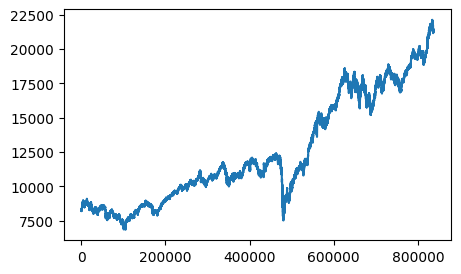

In [298]:
plt.figure(figsize=(5, 3))
plt.plot(data2['close'])
plt.show()

NameError: name 'api_intraday_data_analysis' is not defined